<a href="https://colab.research.google.com/github/Hammadtahir7/Card-Fraud-Detection/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#to upload data file from local drive to google colab
#remove this code if using your local machine
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [241]:
# read the original data file from google colab
# ignore this block if running locally''
#change the name of the file when reading different dataset
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [242]:
# STEP-1
# read the original data file from local system
# use this block if running locally
#change the name of the file when reading different dataset
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [243]:

# get test dataset
import numpy as np
no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices_nonfraud = np.random.choice(non_fraud_indices,10000, replace=False)
fraud_indices = df[df.Class == 1].index
random_indices_fraud = np.random.choice(fraud_indices,17, replace=False)
sample_indices = np.concatenate([random_indices_nonfraud,random_indices_fraud])
test_DS = df.loc[sample_indices]
test_DS.info()

# remaining dataset
remaining_DS=df.drop(sample_indices)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10017 entries, 243743 to 243699
Data columns (total 31 columns):
Time      10017 non-null float64
V1        10017 non-null float64
V2        10017 non-null float64
V3        10017 non-null float64
V4        10017 non-null float64
V5        10017 non-null float64
V6        10017 non-null float64
V7        10017 non-null float64
V8        10017 non-null float64
V9        10017 non-null float64
V10       10017 non-null float64
V11       10017 non-null float64
V12       10017 non-null float64
V13       10017 non-null float64
V14       10017 non-null float64
V15       10017 non-null float64
V16       10017 non-null float64
V17       10017 non-null float64
V18       10017 non-null float64
V19       10017 non-null float64
V20       10017 non-null float64
V21       10017 non-null float64
V22       10017 non-null float64
V23       10017 non-null float64
V24       10017 non-null float64
V25       10017 non-null float64
V26       10017 non-null fl

In [0]:
#STEP-3
# get features and labels for remaining dataset
features=remaining_DS.drop(remaining_DS.columns[remaining_DS.shape[1]-1],axis=1)
labels=remaining_DS[remaining_DS.columns[remaining_DS.shape[1]-1]]

#get features and labels for test dataset
X_test=test_DS.drop(test_DS.columns[test_DS.shape[1]-1],axis=1)
y_test=test_DS[test_DS.columns[test_DS.shape[1]-1]]

In [245]:
#OPTIONAL STEP
# ONLY USE THIS BLOCK WHEN UNDER SAMPLING
# IGNORE THIS BLOCK IF USING ORIGINAL RATIO
# COMMENT OUT THE RELEVENT SAMPLER
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss 
#rus = RandomUnderSampler(sampling_strategy=0.1)
#features, labels = rus.fit_resample(features.values, labels.values)
nr = NearMiss(sampling_strategy=0.1, version=1)
features, labels = nr.fit_resample(features, labels)
features=pd.DataFrame(features)
labels=pd.DataFrame(labels)

print(features.shape)
print(labels.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(5225, 30)
(5225, 1)


In [246]:
# OPTIONAL STEP
# ONLY USE THIS BLOCK FOR SMOTE SAMPLING
# IGNORE THIS BLOCK IF USING ORIGINAL RATIO
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy=0.1) 
features, labels = sm.fit_resample(features, labels) 
features=pd.DataFrame(features)
labels=pd.DataFrame(labels)

print(features.shape)
print(labels.shape)

(5225, 30)
(5225, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [247]:
#OPTIONAL STEP
# show class frequencies
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))
ratio=counts_elements[1]/counts_elements[0]
print(ratio)
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [4750  475]]
0.1
Frequency of unique values of the said array:
[[    0     1]
 [10000    17]]


In [248]:
#STEP-4
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scale features for test sample and remaining samples
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_test = scaler.fit_transform(X_test)

labels=labels.to_numpy()
y_test=y_test.to_numpy()

# split remaining sample dataset into training and validation datasets
X_train, X_val, y_train, y_val=train_test_split(features,labels,test_size=0.2, random_state=42)


print(features[0])
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

[-0.14347193  0.55649244 -0.14621161  0.2314865   0.09924068 -0.0644217
 -0.61859099  0.24094396 -0.14573227  0.09682694  0.08921953 -0.21965732
  0.51917241  0.83017131  0.05231866  1.07825344  0.41266035  0.17985375
 -0.13154765 -0.28010574 -0.02454539 -0.24165337 -0.94132944  0.21277158
  0.62281932  0.44955148  0.14397712 -0.05296324  0.08624536 -0.32771915]
(4180, 30)
(1045, 30)
(4180, 1)
(1045, 1)


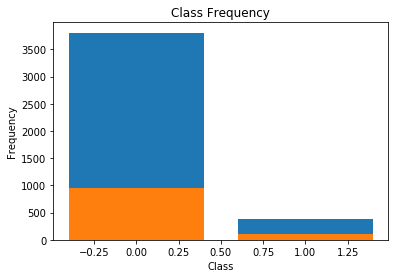

In [250]:
#OPTIONAL STEP
#Plot class frequencies
import matplotlib.pyplot as plt
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_val, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [251]:
#OPTIONAL STEP
# validation data class frequency
unique_elements, counts_elements = np.unique(y_val, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [944 101]]


In [252]:
#STEP-5
#creating forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
print(model_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [253]:
#STEP-6
#creating SVM classifier
from sklearn import svm
model_svm = svm.SVC(probability=True)
print(model_svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [254]:
#STEP-7
#creating LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1,X_train.shape[1])))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                16200     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 16,251
Trainable params: 16,251
Non-trainable params: 0
_________________________________________________________________


In [255]:
#STEP-8
#creating 2d CNN
from keras.layers import Conv2D, Flatten

model_2dcnn = Sequential()
model_2dcnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(5,6,1)))
model_2dcnn.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2dcnn.add(Flatten())
model_2dcnn.add(Dense(1, activation='sigmoid'))
model_2dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2dcnn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 3, 4, 64)          640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 2, 32)          18464     
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 19,169
Trainable params: 19,169
Non-trainable params: 0
_________________________________________________________________


In [256]:
#STEP-9
# creating simple neural network
model_ann=Sequential()
model_ann.add(Dense(64,input_shape=(X_train.shape[1],),activation='relu'))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_ann.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [0]:
#STEP-10
#creating 1D CNN
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

model_1dcnn = Sequential()
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1,X_train.shape[1])))
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model_1dcnn.add(Dropout(0.5))
model_1dcnn.add(MaxPooling1D(pool_size=1))
model_1dcnn.add(Flatten())
model_1dcnn.add(Dense(100, activation='relu'))
model_1dcnn.add(Dense(1, activation='sigmoid'))
model_1dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [259]:
#STEP-11
#fit LSTM
model_lstm.fit(X_train.reshape(X_train.shape[0],1,X_train.shape[1]), y_train, validation_data=(X_val.reshape(X_val.shape[0],1,X_val.shape[1]), y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 4s 905us/step - loss: 0.4398 - acc: 0.9455 - val_loss: 0.2062 - val_acc: 0.9885
Epoch 2/10
4180/4180 [==============================] - 1s 133us/step - loss: 0.1206 - acc: 0.9811 - val_loss: 0.0791 - val_acc: 0.9895
Epoch 3/10
4180/4180 [==============================] - 1s 146us/step - loss: 0.0646 - acc: 0.9840 - val_loss: 0.0647 - val_acc: 0.9914
Epoch 4/10
4180/4180 [==============================] - 1s 136us/step - loss: 0.0526 - acc: 0.9861 - val_loss: 0.0622 - val_acc: 0.9904
Epoch 5/10
4180/4180 [==============================] - 1s 133us/step - loss: 0.0473 - acc: 0.9888 - val_loss: 0.0604 - val_acc: 0.9904
Epoch 6/10
4180/4180 [==============================] - 1s 134us/step - loss: 0.0438 - acc: 0.9892 - val_loss: 0.0584 - val_acc: 0.9904
Epoch 7/10
4180/4180 [==============================] - 1s 133us/step - loss: 0.0415 - acc: 0.9895 - val_loss: 0.0584 - val_acc: 0.9885


In [260]:
#STEP-12
#fiT 2D CNN
model_2dcnn.fit(X_train.reshape(X_train.shape[0],5,6,1), y_train, validation_data=(X_val.reshape(X_val.shape[0],5,6,1), y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 3s 759us/step - loss: 0.1338 - acc: 0.9732 - val_loss: 0.0631 - val_acc: 0.9837
Epoch 2/10
4180/4180 [==============================] - 1s 128us/step - loss: 0.0554 - acc: 0.9866 - val_loss: 0.0501 - val_acc: 0.9904
Epoch 3/10
4180/4180 [==============================] - 1s 125us/step - loss: 0.0479 - acc: 0.9876 - val_loss: 0.0505 - val_acc: 0.9914
Epoch 4/10
4180/4180 [==============================] - 1s 132us/step - loss: 0.0452 - acc: 0.9880 - val_loss: 0.0480 - val_acc: 0.9904
Epoch 5/10
4180/4180 [==============================] - 1s 133us/step - loss: 0.0413 - acc: 0.9888 - val_loss: 0.0503 - val_acc: 0.9885
Epoch 6/10
4180/4180 [==============================] - 1s 134us/step - loss: 0.0412 - acc: 0.9895 - val_loss: 0.0473 - val_acc: 0.9914
Epoch 7/10
4180/4180 [==============================] - 1s 128us/step - loss: 0.0376 - acc: 0.9897 - val_loss: 0.0542 - val_acc: 0.9876


In [261]:
#STEP-13
#fit simple neural network
model_ann.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 3s 687us/step - loss: 0.2808 - acc: 0.9239 - val_loss: 0.0997 - val_acc: 0.9876
Epoch 2/10
4180/4180 [==============================] - 0s 57us/step - loss: 0.0829 - acc: 0.9813 - val_loss: 0.0627 - val_acc: 0.9895
Epoch 3/10
4180/4180 [==============================] - 0s 61us/step - loss: 0.0603 - acc: 0.9840 - val_loss: 0.0555 - val_acc: 0.9904
Epoch 4/10
4180/4180 [==============================] - 0s 62us/step - loss: 0.0513 - acc: 0.9876 - val_loss: 0.0535 - val_acc: 0.9904
Epoch 5/10
4180/4180 [==============================] - 0s 61us/step - loss: 0.0466 - acc: 0.9888 - val_loss: 0.0506 - val_acc: 0.9904
Epoch 6/10
4180/4180 [==============================] - 0s 60us/step - loss: 0.0437 - acc: 0.9892 - val_loss: 0.0513 - val_acc: 0.9895
Epoch 7/10
4180/4180 [==============================] - 0s 61us/step - loss: 0.0418 - acc: 0.9895 - val_loss: 0.0503 - val_acc: 0.9895
Epoch 

In [262]:
#STEP-14
#fit SVM
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [263]:
#STEP-15
#fit RF
model_rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [264]:
#STEP-16
# fit 1D CNN
model_1dcnn.fit(X_train.reshape(X_train.shape[0],1,X_train.shape[1]), y_train, validation_data=(X_val.reshape(X_val.shape[0],1,X_val.shape[1]), y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 3s 787us/step - loss: 0.2169 - acc: 0.9234 - val_loss: 0.0623 - val_acc: 0.9876
Epoch 2/10
4180/4180 [==============================] - 0s 80us/step - loss: 0.0644 - acc: 0.9859 - val_loss: 0.0568 - val_acc: 0.9885
Epoch 3/10
4180/4180 [==============================] - 0s 82us/step - loss: 0.0515 - acc: 0.9883 - val_loss: 0.0533 - val_acc: 0.9885
Epoch 4/10
4180/4180 [==============================] - 0s 87us/step - loss: 0.0461 - acc: 0.9892 - val_loss: 0.0530 - val_acc: 0.9885
Epoch 5/10
4180/4180 [==============================] - 0s 86us/step - loss: 0.0441 - acc: 0.9883 - val_loss: 0.0538 - val_acc: 0.9885
Epoch 6/10
4180/4180 [==============================] - 0s 82us/step - loss: 0.0427 - acc: 0.9900 - val_loss: 0.0531 - val_acc: 0.9885
Epoch 7/10
4180/4180 [==============================] - 0s 82us/step - loss: 0.0393 - acc: 0.9921 - val_loss: 0.0538 - val_acc: 0.9904
Epoch 

In [265]:
#STEP-17
# performance on validation dataset
from sklearn import metrics
X=X_val
y=y_val
y_pred=model_lstm.predict_classes(X.reshape(X.shape[0],1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X.reshape(X.shape[0],5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X).reshape(X.shape[0],1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X.reshape(X.shape[0],1,30)),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X).reshape(X.shape[0],1),axis=1)
print(y_pred.shape)

header=['LSTM','2DCNN','ANN','RF','1DCNN','SVM']

for x in range (len(y_pred[0])):
  print(header[x])
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y, y_pred[:,x])))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y, y_pred[:,x])))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y, y_pred[:,x])))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y,y_pred[:,x])))
  print(metrics.confusion_matrix(y,y_pred[:,x]))
  print("-----------")

(1045, 6)
LSTM
Accuracy: 98.85%
Precision: 95.88%
Recall: 92.08%
F1: 93.94%
[[940   4]
 [  8  93]]
-----------
2DCNN
Accuracy: 99.14%
Precision: 97.92%
Recall: 93.07%
F1: 95.43%
[[942   2]
 [  7  94]]
-----------
ANN
Accuracy: 98.95%
Precision: 96.88%
Recall: 92.08%
F1: 94.42%
[[941   3]
 [  8  93]]
-----------
RF
Accuracy: 99.14%
Precision: 98.94%
Recall: 92.08%
F1: 95.38%
[[943   1]
 [  8  93]]
-----------
1DCNN
Accuracy: 98.95%
Precision: 95.92%
Recall: 93.07%
F1: 94.47%
[[940   4]
 [  7  94]]
-----------
SVM
Accuracy: 99.14%
Precision: 98.94%
Recall: 92.08%
F1: 95.38%
[[943   1]
 [  8  93]]
-----------


In [266]:
# use this block to upload score file from local computer
uploaded2 = files.upload()

Saving score123.csv to score123 (4).csv


In [267]:
#STEP-18
# use this block to read uploaded file for google colaboratory
df1 = pd.read_csv(io.BytesIO(uploaded2['score123.csv']),names=["Classifier", "Ratio", "Accuracy", "Precision", "Recall","F1"])
score=df1.to_numpy()
print(score)

[['LSTM' 1.0 19.55 0.21 100.0 0.42]
 ['2DCNN' 1.0 14.77 0.2 100.0 0.4]
 ['ANN' 1.0 12.9 0.19 100.0 0.39]
 ['RF' 1.0 1.7 0.17 100.0 0.34]
 ['1DCNN' 1.0 5.97 0.18 100.0 0.36]
 ['SVM' 1.0 1.12 0.17 100.0 0.34]]


In [0]:
#STEP-18
#use this block to read score file locally
#create an empty score.csv file to save classifier results
df1 = pd.read_csv('score.csv',names=["Classifier", "Ratio", "Accuracy", "Precision", "Recall","F1"])
score=df1.to_numpy()
print(score)

In [270]:
#STEP-19
#performance on test dataset
X=X_test
y=y_test
y_pred=model_lstm.predict_classes(X.reshape(X.shape[0],1,X.shape[1]))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X.reshape(X.shape[0],5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X).reshape(X.shape[0],1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X.reshape(X.shape[0],1,X.shape[1])),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X).reshape(X.shape[0],1),axis=1)
print(y_pred.shape)

header=['LSTM','2DCNN','ANN','RF','1DCNN','SVM']

for x in range (len(y_pred[0])):
  score_row=header[x]
  print(header[x])
  score_row=np.append(score_row,np.round(ratio,2))
  print(ratio)
  score_row=np.append(score_row, np.round(metrics.accuracy_score(y, y_pred[:,x])*100,2))
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.precision_score(y, y_pred[:,x])*100,2))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.recall_score(y, y_pred[:,x])*100,2))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.f1_score(y,y_pred[:,x])*100,2))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y,y_pred[:,x])))
  print(metrics.confusion_matrix(y,y_pred[:,x]))
  print(score_row)
  print(score_row.shape)
  print("-----------")
  score=np.vstack((score,score_row))

(10017, 6)
LSTM
0.1
Accuracy: 90.51%
Precision: 1.76%
Recall: 100.00%
F1: 3.45%
[[9049  951]
 [   0   17]]
['LSTM' '0.1' '90.51' '1.76' '100.0' '3.45']
(6,)
-----------
2DCNN
0.1
Accuracy: 91.46%
Precision: 1.95%
Recall: 100.00%
F1: 3.82%
[[9145  855]
 [   0   17]]
['2DCNN' '0.1' '91.46' '1.95' '100.0' '3.82']
(6,)
-----------
ANN
0.1
Accuracy: 91.78%
Precision: 1.91%
Recall: 94.12%
F1: 3.74%
[[9178  822]
 [   1   16]]
['ANN' '0.1' '91.78' '1.91' '94.12' '3.74']
(6,)
-----------
RF
0.1
Accuracy: 89.41%
Precision: 1.49%
Recall: 94.12%
F1: 2.93%
[[8940 1060]
 [   1   16]]
['RF' '0.1' '89.41' '1.49' '94.12' '2.93']
(6,)
-----------
1DCNN
0.1
Accuracy: 91.74%
Precision: 1.90%
Recall: 94.12%
F1: 3.73%
[[9174  826]
 [   1   16]]
['1DCNN' '0.1' '91.74' '1.9' '94.12' '3.73']
(6,)
-----------
SVM
0.1
Accuracy: 94.89%
Precision: 3.04%
Recall: 94.12%
F1: 5.88%
[[9489  511]
 [   1   16]]
['SVM' '0.1' '94.89' '3.04' '94.12' '5.88']
(6,)
-----------


In [271]:
print(score)

[['LSTM' 1.0 19.55 0.21 100.0 0.42]
 ['2DCNN' 1.0 14.77 0.2 100.0 0.4]
 ['ANN' 1.0 12.9 0.19 100.0 0.39]
 ['RF' 1.0 1.7 0.17 100.0 0.34]
 ['1DCNN' 1.0 5.97 0.18 100.0 0.36]
 ['SVM' 1.0 1.12 0.17 100.0 0.34]
 ['LSTM' '0.1' '90.51' '1.76' '100.0' '3.45']
 ['2DCNN' '0.1' '91.46' '1.95' '100.0' '3.82']
 ['ANN' '0.1' '91.78' '1.91' '94.12' '3.74']
 ['RF' '0.1' '89.41' '1.49' '94.12' '2.93']
 ['1DCNN' '0.1' '91.74' '1.9' '94.12' '3.73']
 ['SVM' '0.1' '94.89' '3.04' '94.12' '5.88']
 ['LSTM' '0.1' '90.51' '1.76' '100.0' '3.45']
 ['2DCNN' '0.1' '91.46' '1.95' '100.0' '3.82']
 ['ANN' '0.1' '91.78' '1.91' '94.12' '3.74']
 ['RF' '0.1' '89.41' '1.49' '94.12' '2.93']
 ['1DCNN' '0.1' '91.74' '1.9' '94.12' '3.73']
 ['SVM' '0.1' '94.89' '3.04' '94.12' '5.88']]


In [0]:
#use this to write results on score.csv while using google colab
pd.DataFrame(score).to_csv("score.csv",header=None, index=None)
files.download("score.csv")

In [0]:
#STEP-20
#write results onto the score.csv file
#use this block if running locally
pd.DataFrame(score).to_csv("score.csv",header=None, index=None)

In [150]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [151]:
import keras
print(keras.__version__)

2.2.5


In [152]:
import sys
sys.version

'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'